# RFM & KMeans ile Müşteri Segmentasyonu ve Retention Analizi

In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv("C:/Users/ilayda/Desktop/customer_segmentation_rfm/data.csv", encoding='ISO-8859-1') 


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df = df[~df['CustomerID'].isnull()]

In [9]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [11]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [15]:
df[df['InvoiceNo'].astype(str).str.startswith('C')]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [16]:
df = df[~df['InvoiceNo'].str.contains('C', na=False)]  # İptaller

In [17]:
df.shape

(397924, 8)

In [20]:

df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]  # Pozitif değerler

In [21]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [23]:
# essiz urun sayisi nedir?
df["Description"].nunique()

3877

In [24]:
# yukarıdaki baktığımız uniq değerlerden kaçar tane satılmış?
df["Description"].value_counts().head()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1723
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1396
Name: count, dtype: int64

In [25]:
# En çok sipariş edilen ürünleri büyükten küçüğe sıralamak istersem:
df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
JUMBO BAG RED RETROSPOT,46181
WHITE HANGING HEART T-LIGHT HOLDER,36725


In [26]:
# Toplam kaç tane eşsiz fatura kesilmiş?
df["InvoiceNo"].nunique()

18532

In [27]:
# Faturanın altında yazan toplam harcama tutarı
df.groupby("InvoiceNo").agg({"TotalPrice": "sum"}).head()

,TotalPrice
InvoiceNo,
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85



# RFM Metriklerinin Hesaplanması

- Recency = analizin yapıldığı tarih - müşterinin son alım yaptığı tarih
- Frequency = müşterinin yaptığı toplam satın alma
- Monetary = müşterinin yaptığı toplam satın alması sonucunda bıraktığı toplam para


In [28]:
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [29]:
# Analiz yapılan tarihi veri setindeki son tarihten 2 gün sonra yapıyoruz.
import datetime as dt
today_date = dt.datetime(2011, 12, 11)
type(today_date)

datetime.datetime

In [30]:
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'InvoiceNo': lambda Invoice: Invoice.nunique(),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

In [31]:
rfm.head()

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


In [32]:
rfm.columns = ['recency', 'frequency', 'monetary']

rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4338.0,93.059474,100.012264,1.00,18.000,51.000,142.75,374.00
frequency,4338.0,4.272015,7.697998,1.00,1.000,2.000,5.00,209.00
monetary,4338.0,2054.266460,8989.230441,3.75,307.415,674.485,1661.74,280206.02



#  RFM Skorlarının Hesaplanması (Calculating RFM Scores)


In [33]:

rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
# burada rank methoduna first dedik çünkü çok tekrar eden uniq olmayan değer old için ilk gördüğünü al dedik

rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str))

rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4338.0,93.059474,100.012264,1.00,18.000,51.000,142.75,374.00
frequency,4338.0,4.272015,7.697998,1.00,1.000,2.000,5.00,209.00
monetary,4338.0,2054.266460,8989.230441,3.75,307.415,674.485,1661.74,280206.02


# RFM Segmentlerinin Oluşturulması ve Analiz Edilmesi 

In [34]:
# RFM isimlendirmesi
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [35]:
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
# Burada replace ile rfm score değerlerini seg_map ile değiştir diyorum

In [36]:
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

recency        frequency           monetary      
                           mean count       mean count         mean count
segment                                                                  
about_to_sleep        53.312500   352   1.161932   352   471.994375   352
at_Risk              153.785835   593   2.876897   593  1084.535297   593
cant_loose           132.968254    63   8.380952    63  2796.155873    63
champions              6.361769   633  12.413902   633  6857.935482   633
hibernating          217.605042  1071   1.101774  1071   488.643307  1071
loyal_customers       33.608059   819   6.479853   819  2864.247791   819
need_attention        52.427807   187   2.326203   187   897.627861   187
new_customers          7.428571    42   1.000000    42   388.212857    42
potential_loyalists   17.398760   484   2.010331   484  1041.222004   484
promising             23.510638    94   1.000000    94   294.007979    94

In [37]:
new_df = pd.DataFrame()
new_df["new_customer_id"] = rfm[rfm["segment"] == "new_customers"].index

In [38]:
new_df.head()

,new_customer_id
0,12367.0
1,12442.0
2,12478.0
3,12479.0
4,12558.0


In [39]:
rfm = rfm[["recency", "frequency", "monetary", "segment"]]
rfm.index = rfm.index.astype(int)

In [40]:
rfm.head()

,recency,frequency,monetary,segment
CustomerID,,,,
12346,326,1,77183.60,hibernating
12347,3,7,4310.00,champions
12348,76,4,1797.24,at_Risk
12349,19,1,1757.55,promising
12350,311,1,334.40,hibernating


# KMeans ile Segmentasyon

- RFM değerlerini standartlaştır

In [41]:
rfm_kmeans = rfm[["recency", "frequency", "monetary"]]

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_kmeans)

- Elbow yöntemi ile optimal küme sayısını bul

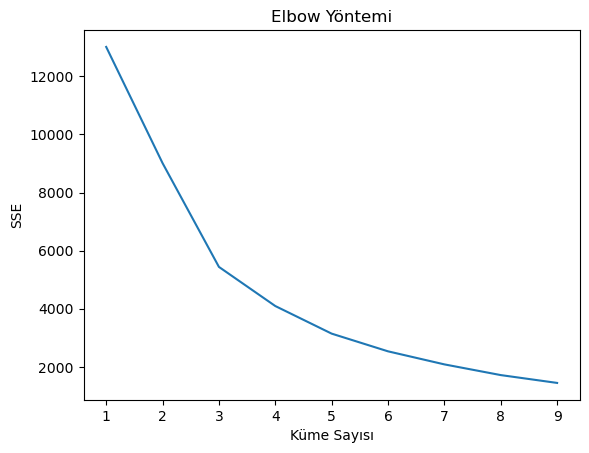

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Küme Sayısı")
plt.ylabel("SSE")
plt.title("Elbow Yöntemi")
plt.show()

In [44]:
# K=3 ile modeli kur
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(rfm_scaled)

# Küme etiketlerini ekle
rfm['Kmeans_Cluster'] = kmeans.labels_

In [47]:
# Küme başına ortalama RFM değerleri
rfm.groupby('Kmeans_Cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'Kmeans_Cluster': 'count'
}).rename(columns={'Kmeans_Cluster': 'Count'}).round(1)

,recency,frequency,monetary,Count
Kmeans_Cluster,,,,
0,41.8,4.7,1857.7,3225
1,6.5,66.4,85904.4,26
2,247.1,1.6,631.7,1087


In [46]:
kmeans_labels = pd.Series(kmeans.labels_, index=rfm.index, name='Kmeans_Cluster')
rfm['Kmeans_Cluster'] = kmeans_labels
print(rfm.head())

            recency  frequency  monetary      segment  Kmeans_Cluster
CustomerID                                                           
12346           326          1  77183.60  hibernating               2
12347             3          7   4310.00    champions               0
12348            76          4   1797.24      at_Risk               0
12349            19          1   1757.55    promising               0
12350           311          1    334.40  hibernating               2


In [48]:
cluster_segment_dist = rfm.groupby(['Kmeans_Cluster', 'segment']).size().reset_index(name='Count')
print(cluster_segment_dist.head())

   Kmeans_Cluster         segment  Count
0               0  about_to_sleep    352
1               0         at_Risk    312
2               0      cant_loose     47
3               0       champions    611
4               0     hibernating    281


In [50]:
cluster_segment_dist['Percentage'] = cluster_segment_dist.groupby('Kmeans_Cluster')['Count'].transform(lambda x: 100 * x / x.sum())
print(cluster_segment_dist.head())

   Kmeans_Cluster         segment  Count  Percentage
0               0  about_to_sleep    352   10.914729
1               0         at_Risk    312    9.674419
2               0      cant_loose     47    1.457364
3               0       champions    611   18.945736
4               0     hibernating    281    8.713178


In [51]:
pivot_dist = cluster_segment_dist.pivot(index='Kmeans_Cluster', columns='segment', values='Percentage').fillna(0).round(2)
print(pivot_dist)

segment         about_to_sleep  at_Risk  cant_loose  champions  hibernating  \
Kmeans_Cluster                                                                
0                        10.91     9.67        1.46      18.95         8.71   
1                         0.00     0.00        0.00      84.62         0.00   
2                         0.00    25.85        1.47       0.00        72.68   

segment         loyal_customers  need_attention  new_customers  \
Kmeans_Cluster                                                   
0                         25.30             5.8            1.3   
1                         11.54             0.0            0.0   
2                          0.00             0.0            0.0   

segment         potential_loyalists  promising  
Kmeans_Cluster                                  
0                             14.98       2.91  
1                              3.85       0.00  
2                              0.00       0.00  



* Küme 1 en değerli müşteriler grubu, bu küme için özel kampanya yapılabilir.

* Küme 0 orta ve üst segmentten müşteriler, sadık ve potansiyel sadıklar. Onları tutmaya odaklanılabilir.

* Küme 2 ise risk altındaki veya uyuyan müşteriler, onları yeniden aktif etmek için çalışmalar yapılmalı.

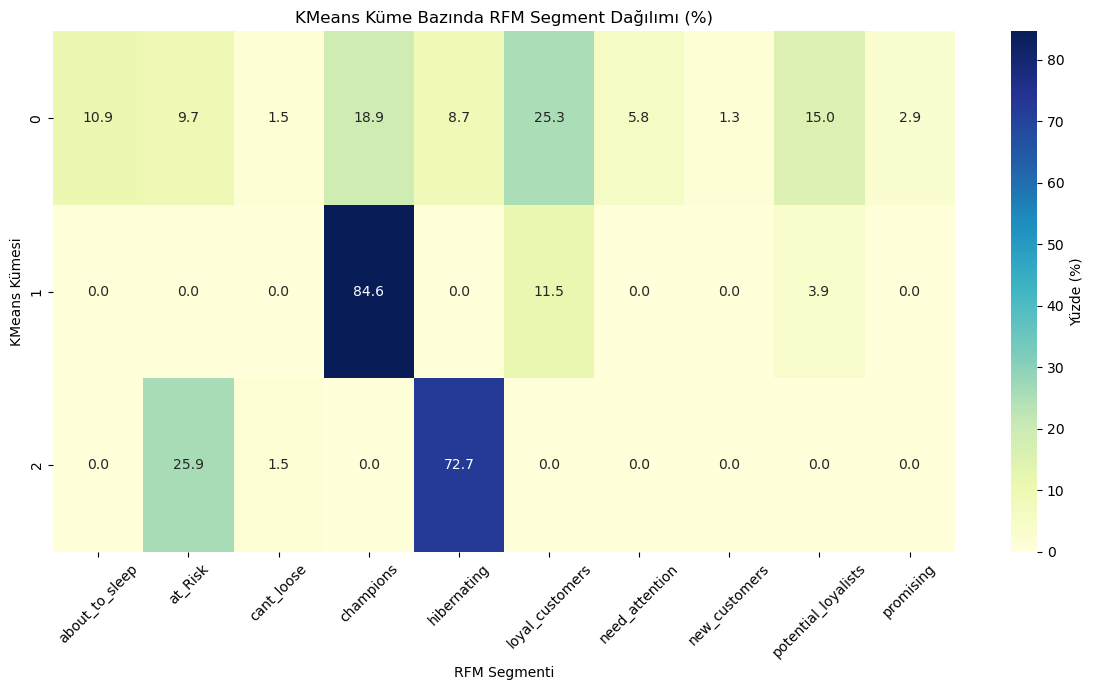

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.heatmap(pivot_dist, annot=True, cmap='YlGnBu', fmt='.1f', cbar_kws={'label': 'Yüzde (%)'})
plt.title('KMeans Küme Bazında RFM Segment Dağılımı (%)')
plt.ylabel('KMeans Kümesi')
plt.xlabel('RFM Segmenti')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- KMeans ve RFM sonuçları uyumlu, birbirini destekliyor.

- RFM, KMeans sonuçlarını “anlamlandırıyor”, KMeans ise RFM’in kısıtlı ve sabit kurallarının ötesinde esneklik ve yeni perspektifler sunuyor.

- İkisini birlikte kullanmak, hem iş hem teknik açıdan güçlü, esnek ve anlaşılır müşteri segmentasyonu sağlar.

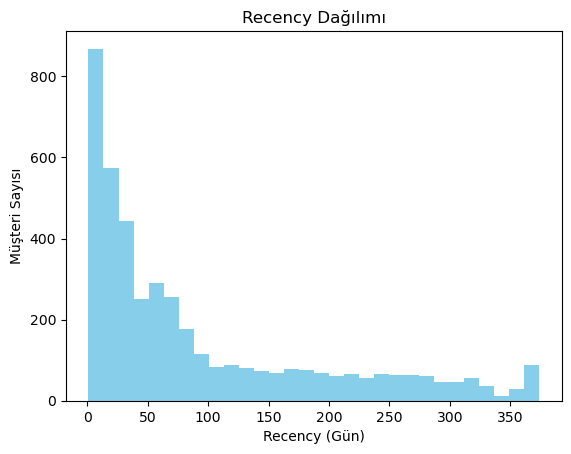

In [53]:
import matplotlib.pyplot as plt

plt.hist(rfm['recency'], bins=30, color='skyblue')
plt.title('Recency Dağılımı')
plt.xlabel('Recency (Gün)')
plt.ylabel('Müşteri Sayısı')
plt.show()

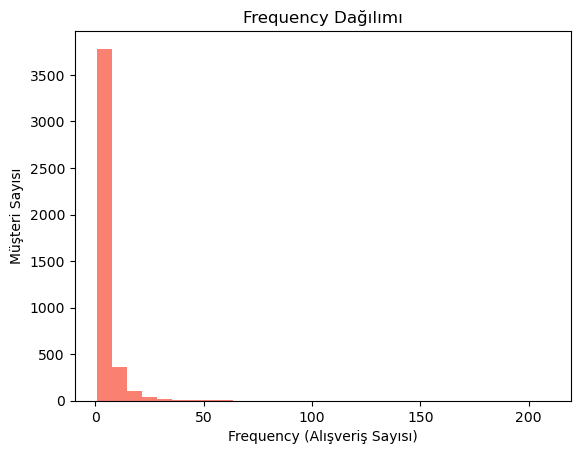

In [54]:
plt.hist(rfm['frequency'], bins=30, color='salmon')
plt.title('Frequency Dağılımı')
plt.xlabel('Frequency (Alışveriş Sayısı)')
plt.ylabel('Müşteri Sayısı')
plt.show()

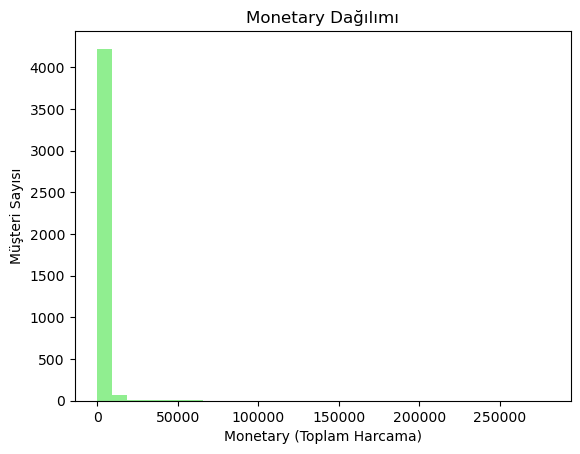

In [55]:
plt.hist(rfm['monetary'], bins=30, color='lightgreen')
plt.title('Monetary Dağılımı')
plt.xlabel('Monetary (Toplam Harcama)')
plt.ylabel('Müşteri Sayısı')
plt.show()

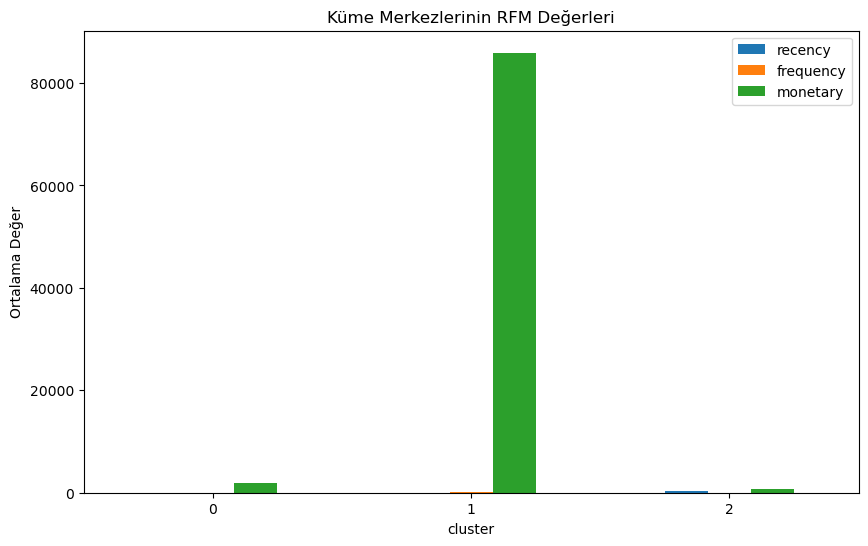

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

centroids_df = pd.DataFrame(centroids, columns=['recency', 'frequency', 'monetary'])
centroids_df['cluster'] = centroids_df.index

centroids_df.set_index('cluster').plot(kind='bar', figsize=(10,6))
plt.title('Küme Merkezlerinin RFM Değerleri')
plt.ylabel('Ortalama Değer')
plt.xticks(rotation=0)
plt.show()

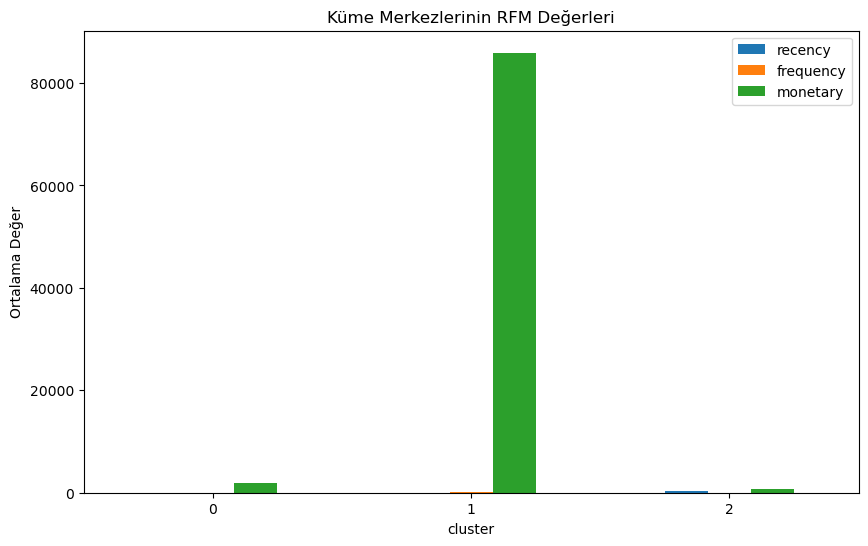

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

centroids_df = pd.DataFrame(centroids, columns=['recency', 'frequency', 'monetary'])
centroids_df['cluster'] = centroids_df.index

centroids_df.set_index('cluster').plot(kind='bar', figsize=(10,6))
plt.title('Küme Merkezlerinin RFM Değerleri')
plt.ylabel('Ortalama Değer')
plt.xticks(rotation=0)
plt.show()


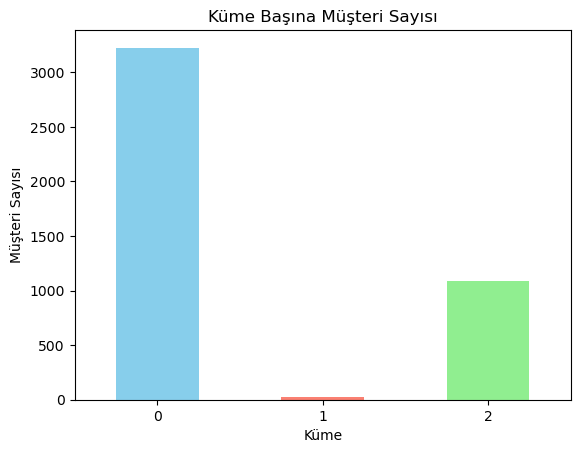

In [58]:
import matplotlib.pyplot as plt

rfm['Kmeans_Cluster'].value_counts().sort_index().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Küme Başına Müşteri Sayısı')
plt.xlabel('Küme')
plt.ylabel('Müşteri Sayısı')
plt.xticks(rotation=0)
plt.show()

- En kalabalık küme 0 (orta segment), sonra 2 (uyuyan/riski olanlar), en az da 1 (en değerli “champions”) müşterilerden oluşuyor.Bu, tipik müşteri dağılımıdır; en değerli müşteriler sayıca daha az olur, ama gelir katkıları yüksektir.

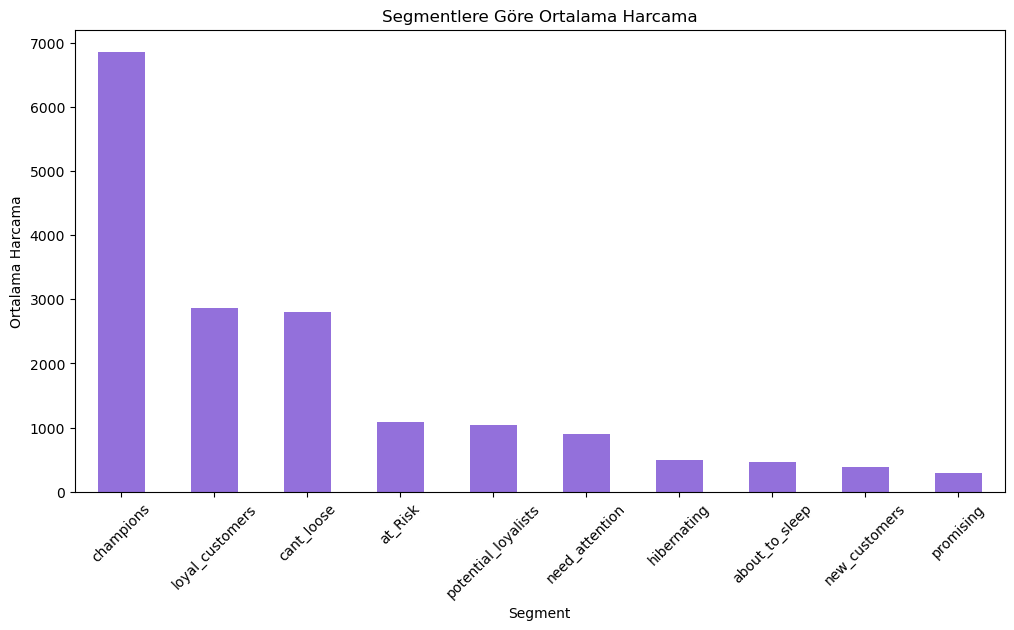

In [60]:
avg_monetary_by_segment = rfm.groupby('segment')['monetary'].mean().sort_values(ascending=False)

avg_monetary_by_segment.plot(kind='bar', figsize=(12,6), color='mediumpurple')
plt.title('Segmentlere Göre Ortalama Harcama')
plt.ylabel('Ortalama Harcama')
plt.xlabel('Segment')
plt.xticks(rotation=45)
plt.show()

# Retention Analizi

In [64]:
# Müşterilerin ilk satın alma ayını bulalım
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
first_purchase = df.groupby('CustomerID')['InvoiceMonth'].min().reset_index()
first_purchase.rename(columns={'InvoiceMonth': 'FirstMonth'}, inplace=True)
first_purchase.head()

,CustomerID,FirstMonth
0,12346.0,2011-01
1,12347.0,2010-12
2,12348.0,2010-12
3,12349.0,2011-11
4,12350.0,2011-02


In [65]:
# Her ay aktif müşteri sayısını hesaplayalım
monthly_active = df.groupby('InvoiceMonth')['CustomerID'].nunique()
monthly_active.head()

InvoiceMonth
2010-12    885
2011-01    741
2011-02    758
2011-03    974
2011-04    856
Freq: M, Name: CustomerID, dtype: int64

In [66]:
# Retention oranlarını hesaplayalım
retention = pd.DataFrame()

for month in monthly_active.index:
    total_customers = first_purchase[first_purchase['FirstMonth'] <= month].shape[0]
    active_customers = monthly_active.loc[month]
    retention.loc[month, 'RetentionRate'] = (active_customers / total_customers) * 100

retention.head()

,RetentionRate
2010-12,100.000000
2011-01,56.912442
2011-02,45.065398
2011-03,45.641987
2011-04,35.168447


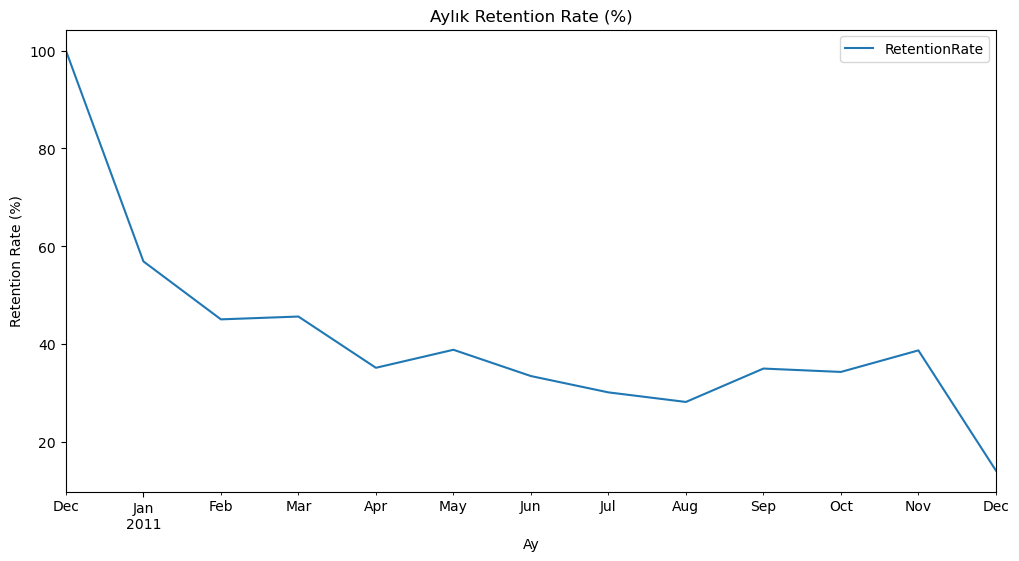

In [67]:
# Retention grafiğini çizelim
import matplotlib.pyplot as plt

retention.plot(figsize=(12,6))
plt.title('Aylık Retention Rate (%)')
plt.ylabel('Retention Rate (%)')
plt.xlabel('Ay')
plt.show()

# KMeans Küme Bazında Retention Analizi

- Müşterileri küme etiketleriyle birleştir

In [74]:
df['CustomerID'] = df['CustomerID'].astype(int)
rfm['CustomerID'] = rfm.index

df_merged = df.merge(rfm[['Kmeans_Cluster']], left_on='CustomerID', right_on='CustomerID', how='left')

In [77]:
df_merged['InvoiceMonth'] = df_merged['InvoiceDate'].dt.to_period('M')

# Her müşterinin ilk alışveriş ayı
first_purchase = df_merged.groupby('CustomerID')['InvoiceMonth'].min().reset_index()
first_purchase.rename(columns={'InvoiceMonth': 'FirstMonth'}, inplace=True)

# Kümeleri de ekleyelim
first_purchase = first_purchase.merge(rfm[['Kmeans_Cluster']], left_on='CustomerID', right_index=True)

# Aylık aktif müşteri sayısı küme bazında
monthly_active = df_merged.groupby(['Kmeans_Cluster', 'InvoiceMonth'])['CustomerID'].nunique().reset_index()

retention_by_cluster = pd.DataFrame()

for cluster in monthly_active['Kmeans_Cluster'].unique():
    cluster_monthly = monthly_active[monthly_active['Kmeans_Cluster'] == cluster]
    cluster_first = first_purchase[first_purchase['Kmeans_Cluster'] == cluster]

    rates = []
    for month in cluster_monthly['InvoiceMonth']:
        total_customers = cluster_first[cluster_first['FirstMonth'] <= month].shape[0]
        active_customers = cluster_monthly[cluster_monthly['InvoiceMonth'] == month]['CustomerID'].values[0]
        rate = (active_customers / total_customers) * 100 if total_customers > 0 else 0
        rates.append({'Kmeans_Cluster': cluster, 'InvoiceMonth': month, 'RetentionRate': rate})

    retention_by_cluster = pd.concat([retention_by_cluster, pd.DataFrame(rates)], ignore_index=True)
    retention_by_cluster['InvoiceMonth'] = retention_by_cluster['InvoiceMonth'].astype(str)

C:\Users\ilayda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ilayda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ilayda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ilayda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

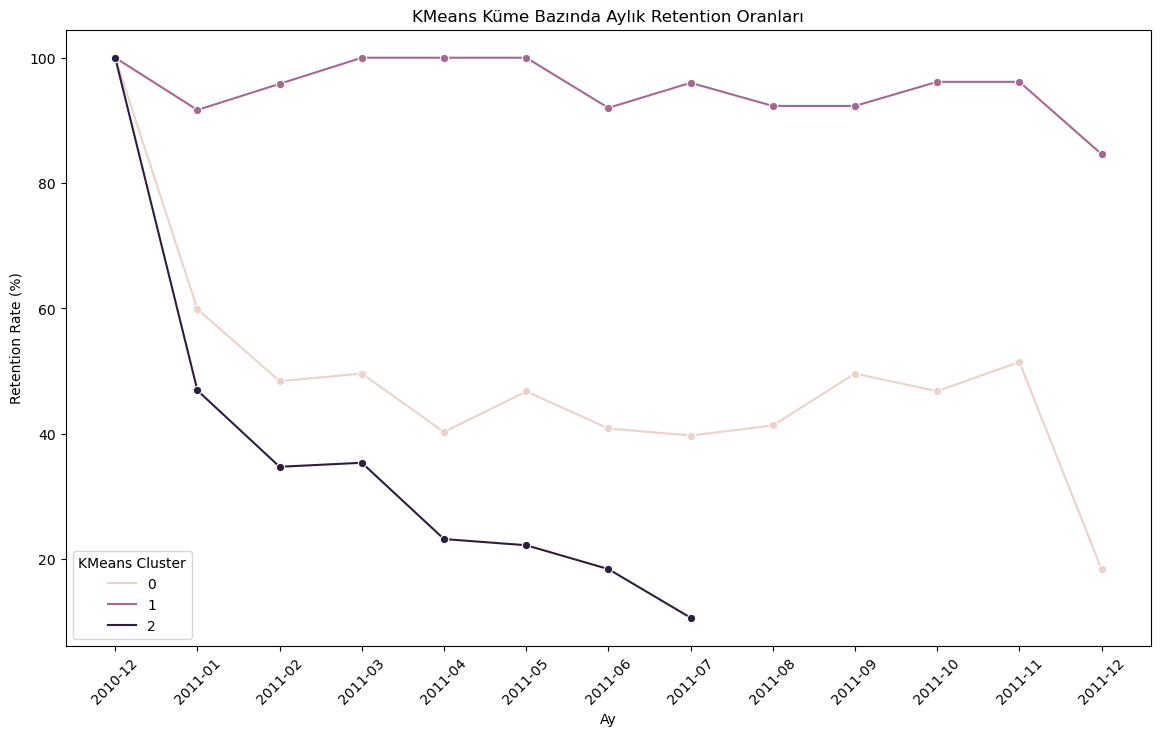

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))
sns.lineplot(data=retention_by_cluster, x='InvoiceMonth', y='RetentionRate', hue='Kmeans_Cluster', marker='o')
plt.title('KMeans Küme Bazında Aylık Retention Oranları')
plt.ylabel('Retention Rate (%)')
plt.xlabel('Ay')
plt.xticks(rotation=45)
plt.legend(title='KMeans Cluster')
plt.show()

# KMeans Küme Bazında Retention Analizi Yorumu

- Cluster 1: En değerli müşterilerden oluşuyor. Başlangıçta %100 retention oranı ile çok sadık bir grup, zamanla azalsa da yaklaşık %85 gibi yüksek bir seviyede kalıyor. Bu, bu müşterilerin markaya güçlü bağlılığını gösteriyor.

- Cluster 0: Orta segment müşteriler. Retention oranı hızlı düşüyor; 1 ayda %60’a, 1 yıl sonunda ise %20’ye kadar iniyor. Bu, bu segmentteki müşterilerin markayla ilişkisinin daha kırılgan olduğunu ve sadakati artırmak için özel stratejiler gerektiğini gösteriyor.

- Cluster 2: Daha az değerli ve riskli müşteriler. Retention oranı 1 ay içinde %45’e kadar düşüyor ve zamanla hızla azalıyor. Bu grup için yeniden kazanma kampanyaları öncelikli olmalı.